In [140]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')
dataset

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [125]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)

In [126]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [137]:
X,y

(array([[-1.69692744e+00],
        [ 4.60783817e-01],
        [ 1.29641497e+00],
        [-1.52894871e-01],
        [ 1.11934400e+00],
        [ 6.37672702e-01],
        [ 3.35493359e-01],
        [-9.96004115e-01],
        [-8.79915004e-02],
        [ 3.70370068e-01],
        [-3.64898398e-01],
        [ 5.56151537e-01],
        [-4.94383049e-01],
        [ 9.49740196e-01],
        [ 8.01118494e-01],
        [-2.52939962e-04],
        [-4.40436632e-01],
        [ 1.16926591e+00],
        [-3.44386604e-01],
        [-1.04578477e+00],
        [ 1.77689413e+00],
        [ 1.69710419e+00],
        [-1.52320603e-01],
        [-7.61297225e-01],
        [ 2.97688891e-01],
        [ 1.07372557e+00],
        [ 8.61215827e-01],
        [ 1.51143924e+00],
        [-2.28998849e-01],
        [ 1.64827489e-01],
        [ 3.36751351e-01],
        [-1.38081742e+00],
        [-6.72528769e-01],
        [ 9.49334875e-01],
        [ 8.81266735e-01],
        [-3.62753460e-01],
        [ 1.33414261e+00],
 

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [183]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

SVR()

In [184]:
y_pred = regressor.predict(X_test)

y_pred

array([-0.82131684,  1.60766448,  0.60086692, -1.26671794, -1.04445142,
        1.24627405, -0.03364303,  0.12097874,  0.42736289, -0.67189034,
        0.03809238,  0.22458664,  0.50673147,  0.50464723,  0.65232215,
       -1.10182462, -0.77348709,  0.40362414, -0.68896064,  1.5239741 ])

In [185]:
y_pred_2d = y_pred.reshape(-1, 1)

y_pred = sc_y.inverse_transform(y_pred_2d)

In [186]:
# Reshape y_test_1d to a 2D array with a single column
y_test_2d = y_test.reshape(-1, 1)

# Use inverse_transform() with y_test_2d
real_values = sc_y.inverse_transform(y_test_2d).flatten()

# Make sure y_pred is 1D
y_pred = y_pred.flatten()

# Create DataFrame
df = pd.DataFrame({'Real Values': real_values, 'Predicted Values': y_pred})
df

,Real Values,Predicted Values
0,44.862491,59.613541
1,83.878565,96.349200
2,71.139728,81.122499
3,45.570589,52.877341
4,62.124571,56.238877
5,77.768482,90.883569
6,57.251819,71.526237
7,60.723602,73.864720
8,71.300880,78.498442
9,79.102830,61.873451


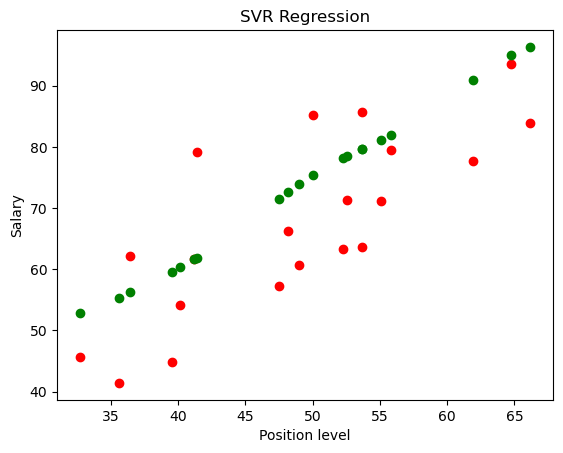

In [187]:
import matplotlib.pyplot as plt

# Reshape X_test to a 2D array
X_test_2d = X_test.reshape(-1, 1)

# Plotting
plt.scatter(sc_X.inverse_transform(X_test_2d), sc_y.inverse_transform(y_test.reshape(-1, 1)), color='red')
plt.scatter(sc_X.inverse_transform(X_test_2d), y_pred, color='green')
plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [188]:
plt.scatter(sc_X.inverse_transform(X_test_2d), y_pred, color='red')
plt.plot(sc_X.inverse_transform(X_test_2d)., y_pred, color='green')
plt.show()

SyntaxError: invalid syntax (67335152.py, line 2)

In [ ]:
y_pred

In [189]:
sc_X.inverse_transform(X_test_2d)

array([[39.55790122],
       [66.18981661],
       [55.0780959 ],
       [32.66904376],
       [36.43600951],
       [61.89622268],
       [47.48120861],
       [48.95588857],
       [52.55001444],
       [41.37772653],
       [48.14985889],
       [50.03957594],
       [53.69163957],
       [53.66093226],
       [55.80573336],
       [35.56783005],
       [40.16689901],
       [52.22399609],
       [41.18201611],
       [64.70713867]])

In [190]:
import pandas as pd

# Convert y_pred array to pandas Series
y_pred_series = pd.Series(y_pred)

# Now y_pred_series contains the predicted values as a pandas Series
print(y_pred_series)

0     59.613541
1     96.349200
2     81.122499
3     52.877341
4     56.238877
5     90.883569
6     71.526237
7     73.864720
8     78.498442
9     61.873451
10    72.611156
11    75.431675
12    79.698804
13    79.667282
14    81.900702
15    55.371170
16    60.336913
17    78.139420
18    61.615282
19    95.083475
dtype: float64


In [191]:
# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X_test_series.values.reshape(-1, 1), y_pred_series.values)

# Get the coefficients of the regression model
slope = regression_model.coef_[0]
intercept = regression_model.intercept_


In [192]:
slope = regression_model.coef_[0]
slope

1.357670126471683

In [193]:
intercept

6.786694085863402

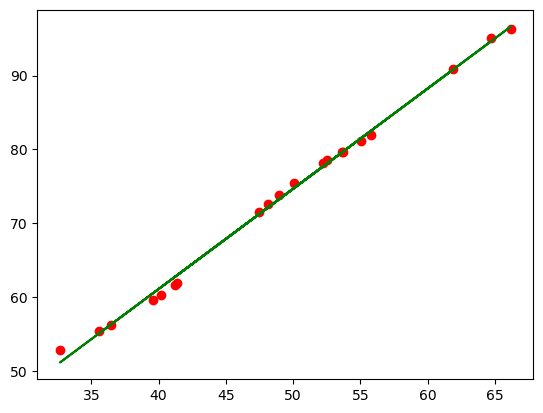

In [194]:
plt.scatter(sc_X.inverse_transform(X_test_2d), y_pred, color='red')
plt.plot(sc_X.inverse_transform(X_test_2d), slope * sc_X.inverse_transform(X_test_2d) + intercept, color='green')
plt.show()

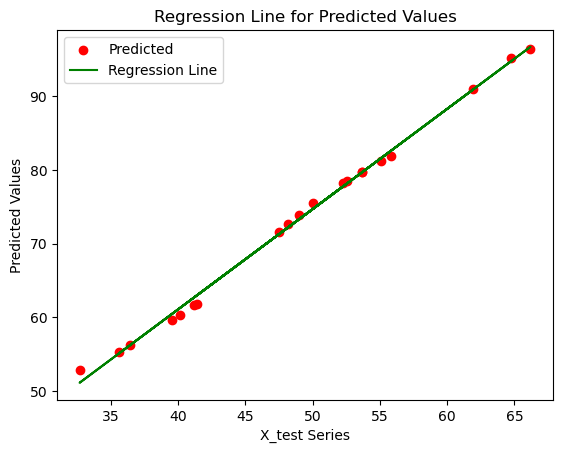

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X_test_series.values.reshape(-1, 1), y_pred_series.values)

# Get the coefficients of the regression model
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Plotting the scatter plot
plt.scatter(X_test_series.values, y_pred_series.values, color='red', label='Predicted')

# Plotting the regression line
plt.plot(X_test_series.values, slope * X_test_series.values + intercept, color='green', label='Regression Line')

# Adding labels and legend
plt.title('Regression Line for Predicted Values')
plt.xlabel('X_test Series')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()


In [196]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score,mean_absolute_percentage_error
mean_absolute_error(y_test,y_pred)

73.44113934876138

In [197]:
mean_absolute_percentage_error(y_test,y_pred)

242.65732599319767

In [198]:
r2_score(y_test,y_pred)

-6167.86726891531

In [200]:
regressor.score(X_train,y_train)

0.5972112644513868

In [201]:
regressor.score(X_test,y_test)

0.42841091016885047